<a href="https://colab.research.google.com/github/MuktoFlame/ML-Journey/blob/main/01_PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Preparing & Loading

### Linear Regression

$Y = WX + b$

In [ ]:
# Create *known* parameter
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Split data into training and test sets

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

  if predictions is not None:
    # Plot the predictions in red
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

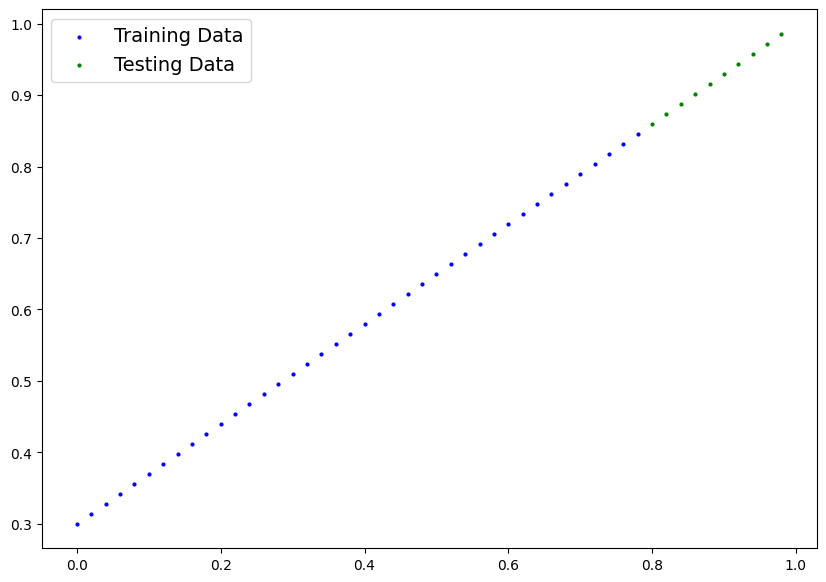

In [ ]:
plot_predictions()

## Build a model

In [ ]:
# Create a LInear Regression Model
# <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype=torch.float
    ))
    self.bias = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype=torch.float
    ))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Crear an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
model_0.weight, model_0.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Making predictions using torch.inference_mode()
with torch.inference_mode():  # Turn off gradient tracking --> faster computation for large data
  y_preds = model_0(X_test)
y_preds, y_test

"""
Note: in older PyTorch code you might also see torch.no_grad()
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds = model_0(X_test)  # It can directly be written no need for with torch.inference_mode()
"""

'\nNote: in older PyTorch code you might also see torch.no_grad()\nwith torch.no_grad():\n  y_preds = model_0(X_test)\n\ny_preds = model_0(X_test)  # It can directly be written no need for with torch.inference_mode()\n'

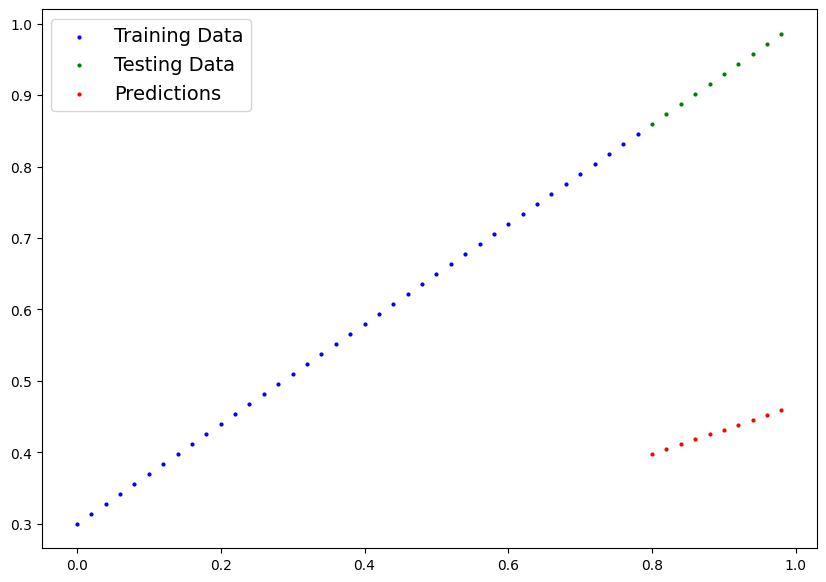

In [ ]:
plot_predictions(predictions=y_preds)

## Train model

### Creating a loss function and optimizer in PyTorch

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01)   # lr = learning rate

### Creating an optimization loop in PyTorch

In [ ]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

### Training
# Loop through the data
for epoch in range(epochs):
  # 0.Set the model to training mode
  model_0.train()

  # 1.Forward pass
  y_preds = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4.Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5.Perform gradient decent
  # by default how the optimizer changes will acculumate through the loop so we have to zero them above in step 3 for the next iteration
  optimizer.step()

  ### testing
  model_0.eval()  # turns off gradint tracking

  with torch.inference_mode():
    # 1.Forward pass on test data
    test_preds = model_0(X_test)

    # 2.Caculate loss on test data
    test_loss = loss_fn(test_preds, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f}")
# Print out model state_dict()
model_0.state_dict()

Epoch: 0 | Loss: 0.3129 | Test loss: 0.4811
Epoch: 10 | Loss: 0.1977 | Test loss: 0.3464
Epoch: 20 | Loss: 0.0891 | Test loss: 0.2173
Epoch: 30 | Loss: 0.0531 | Test loss: 0.1446
Epoch: 40 | Loss: 0.0454 | Test loss: 0.1136
Epoch: 50 | Loss: 0.0417 | Test loss: 0.0992
Epoch: 60 | Loss: 0.0382 | Test loss: 0.0889
Epoch: 70 | Loss: 0.0348 | Test loss: 0.0806
Epoch: 80 | Loss: 0.0313 | Test loss: 0.0723
Epoch: 90 | Loss: 0.0279 | Test loss: 0.0647
Epoch: 100 | Loss: 0.0245 | Test loss: 0.0565
Epoch: 110 | Loss: 0.0210 | Test loss: 0.0482
Epoch: 120 | Loss: 0.0176 | Test loss: 0.0406
Epoch: 130 | Loss: 0.0142 | Test loss: 0.0323
Epoch: 140 | Loss: 0.0107 | Test loss: 0.0241
Epoch: 150 | Loss: 0.0073 | Test loss: 0.0165
Epoch: 160 | Loss: 0.0039 | Test loss: 0.0082
Epoch: 170 | Loss: 0.0089 | Test loss: 0.0050
Epoch: 180 | Loss: 0.0089 | Test loss: 0.0050
Epoch: 190 | Loss: 0.0089 | Test loss: 0.0050


OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
weight, bias

(0.7, 0.3)

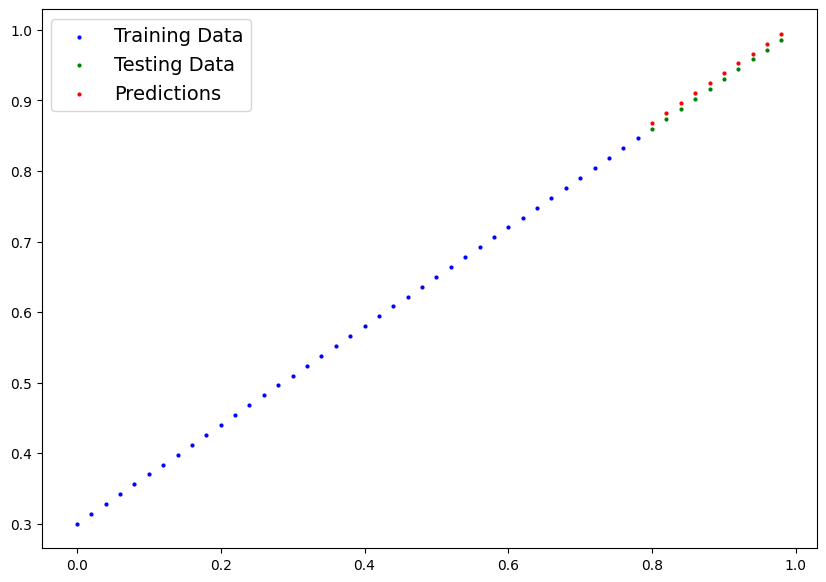

In [ ]:
plot_predictions(predictions=y_preds_new)

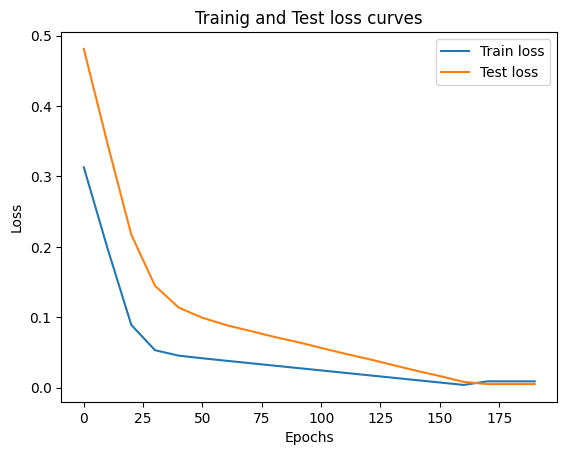

In [ ]:
# Plot the loss curve
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Trainig and Test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Saving and loading a model in PyTorch

1. torch.save() - allows you to save a PyTorch object in Python's pickle format
2. torch.load() - allows you to load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - allows to load a model's saved state dictionary

In [ ]:
# Saving a PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


"""
# To save the model
torch.save(model_0, MODEL_SAVE_PATH)
# To load the model
model = torch.load(PATH)
"""


Saving model to: models/01_pytorch_workflow_model.pth


'\n# To save the model\ntorch.save(model_0, MODEL_SAVE_PATH)\n# To load the model\nmodel = torch.load(PATH)\n'

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Aug 25 14:41 01_pytorch_workflow_model.pth


In [ ]:
# Loading a PyTorch model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
test_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])